<a href="https://www.nvidia.com/en-us/deep-learning-ai/education/"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>

<a href="https://www.mayoclinic.org/"><img src="images/mayologo.png" alt="梅奥标志"></a>
# 使用 MedNIST 数据集进行医学影像分类
### 特别致谢：<a href="https://www.mayo.edu/research/labs/radiology-informatics/overview">医学博士Bradley J.Erickson</a> - 梅奥医院放射科
#### 致谢：<a href="http://www.cancerimagingarchive.net/">癌症影像存档库 (TCIA)</a>；<a href ="http://rsnachallenges.cloudapp.net/competitions/4">北美放射学会</a>；<a href= "http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf">美国国立卫生研究院</a>

## 介绍

人工智能（AI）的使用，尤其是深层卷积神经网络（CNN）的使用，已经提高了放射学影像处理与诊断的速度。这种提速并非以准确性为代价，先进的算法可与当前的护理标准相提并论。但最好的人类专家仍然胜过AI，因此正在开发的技术是对医生和研究人员的补充，而不是他们的替代品。故而对使用这些新工具的人员来说，在一定程度上熟悉其内部工作原理是很重要的。

以下是本实验的概述。在第一部分中，我们将创建数据集，设计和训练CNN，并使用未事先看见的图像对其进行测试。在第二部分中，我们将创建第二个经过扩充的数据集，训练第二个CNN，并评估性能以验证我们的数据扩充方法。

### 大纲
#### 第1部分
<ul>
    <li>讨论深度学习框架</li>
    <li>创建用于训练和测试的数据集</li>
    <li>转换并划分数据集</li>
    <li>构建CNN </li>
    <li>训练模型</li>
    <li>测试新图像</li>
</ul>

#### 第2部分
<ul>
    <li>图像变换和数据扩充</li>
    <li>创建扩充的数据集</li>
    <li>训练新模型</li>
    <li>性能比较和验证</li>
    <li>练习</li>
</ul>


### 使用JupyterLab
对于此动手实验，我们使用[JupyterLab](https://jupyterlab.readthedocs.io/en/stable/)来管理我们的环境。 [JupyterLab界面](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)像一个仪表板，可用于访问交互式iPython笔记本以及我们的运行环境下的文件目录结构，以及一个进入Ubuntu操作系统的终端窗口。您将看到的第一个视图包括顶部的菜单栏，左侧的文件浏览器和最初打开“启动器”页面的主工作区。

在文件浏览器中，您可以像在任何其它的文件浏览器中那样浏览文件。双击其中任何项目将打开一个新标签页，其中包含该项目内容。

主工作区包括以选项卡的方式显示打开的文件，并可以根据需要关闭、移动和编辑这些文件。

笔记本（包括此笔记本）由一系列内容和代码 *单元* 组成。要在代码单元格中执行代码，请在突出显示单元格的同时按`Shift + Enter`或上方菜单栏中的“运行”按钮。有时，内容单元会切换到编辑模式，按下`Shift + Enter`将其切换回可读形式。

# 第1部分：训练一个医学图像分类模型

## 深度学习和框架
通用的深度神经网络由一系列<em>层</em>构成，并在输入层和输出层之间运行。每层均由<em>节点</em>构成，用于存储中间数值。在经<em>权重</em>张量执行线性转换以及非线性<em>激活函数</em>进行相应处理后，神经网络会将每层的值送入下一层。我们将这种整体结构称为<em>架构</em>。

我们将会研究<em>监督式学习</em>，这种学习模式会在提供每个输入数据（X 值）的同时一并提供目标输出值或标注（Y 值）。输入可以是极为普通的数据类型，如图像、句子、视频片段等。输出通常是图像类别、文本情感或物体位置等内容。

神经网络会将 X 值映射到输出（Y 预测值）。将 Y 预测值与实际 Y 值进行比较，并通过<em>损失函数</em>对两者的差值进行量化。在网络对小批量的数据集进行多次迭代或<em>训练多次</em>后，<em>优化器</em>会改变网络的权重，从而将损失最小化，这个过程我们称为梯度下降算法。我们将此过程称为网络<em>训练</em>。

在为网络提供足够大且详细的训练数据集、创建足够复杂的网络架构，并经过足够久的训练后，该模型应能为先前从未见过的输入预测出正确的标注。我们将为训练好的模型提供新输入及利用模型预测结果的过程称为<em>部署</em>。

使用标准编程库创建和训练网络的负担十分巨大。所幸，深度学习爱好者们通过创建专门的库或<em>框架</em>，大大减轻了这项工作的负担，使我们得以将数千行复杂的代码压缩成直观易读的几行代码。本实验使用了 PyTorch 框架，它对初学者而言简单易上手，同时也能为高级用户展示出特有的技术优势。其他流行的框架包括 TensorFlow、MS Cognitive Toolkit 和 MXNet，且每个框架都已在易用性、灵活性、速度和准确度之间实现了独有的折衷。

还有一些更高级的框架，称为“<em>包装器</em>”，它们可以通过更简单的代码甚至图形界面进行设置，转而又能仅凭一个开关设置在几个不同的低级框架之间实现切换。Keras 是一个基于代码的热门包装器，而 DIGITS 则是图形化包装器。

在下方代码中，我们将加载 PyTorch 框架以及其他实用库。由于训练过程本身涉及大量数学计算，而代码在 GPU 上的运行速度要远远超出通用CPU，所以我们通过设置参数来实现 GPU 加速。

### 代码块 1

In [1]:
import numpy as np
import os
import time
%matplotlib inline
import matplotlib.pyplot as mp
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as om
import torchvision as tv
import torch.utils.data as dat

# confusion matrix plotting
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

if torch.cuda.is_available():     # Make sure GPU is available
    dev = torch.device("cuda:0")
    kwar = {'num_workers': 8, 'pin_memory': True}
    cpu = torch.device("cpu")
else:
    print("Warning: CUDA not found, CPU only.")
    dev = torch.device("cpu")
    kwar = {}
    cpu = torch.device("cpu")

np.random.seed(551)

## 加载数据与创建数据集
成本、隐私限制以及某些罕见的特殊情况使得医疗数据集的收集工作别具挑战性。从不同来源收集到数据后，我们需要对数据进行标准化处理，以供后续的模型训练使用。该数据准备阶段已经超出了本初级课程的内容范围，我们在此将不作深入介绍。收集的图像源自于 TCIA 的若干数据集、RSNA 骨龄挑战赛以及 NIH 胸部 X 光片数据集，我们已将其标准化处理为同等大小。

下方代码用于检查图像集，整理文件名，以及显示图像的部分统计数据。

### 代码块 2

In [2]:
# Run this to make sure dataset is fresh
!rm -r data/resized
!cp -r data/resizedbackup data/resized

In [3]:
dataDir = 'data/resized'               # The main data directory
classNames = os.listdir(dataDir)  # Each type of image can be found in its own subdirectory
numClass = len(classNames)        # Number of types = number of subdirectories
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]                     # A nested list of filenames
numEach = [len(imageFiles[i]) for i in range(numClass)]     # A count of each type of image
imageFilesList = []               # Created an un-nested list of filenames
imageClass = []                   # The labels -- the type of each individual image in the list
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)        # Total number of images
imageWidth, imageHeight = Image.open(imageFilesList[0]).size         # The dimensions of each image

print("There are",numTotal,"images in",numClass,"distinct categories")
print("Label names:",classNames)
print("Label counts:",numEach)
print("Image dimensions:",imageWidth,"x",imageHeight)

There are 58954 images in 6 distinct categories
Label names: ['CXR', 'ChestCT', 'Hand', 'BreastMRI', 'HeadCT', 'AbdomenCT']
Label counts: [10000, 10000, 10000, 8954, 10000, 10000]
Image dimensions: 64 x 64


由于此图像集与 <a href="http://yann.lecun.com/exdb/mnist/">MNIST 数据集</a>相近，后者总计包含 70000 张 28 x 28 大小的手写数字图像（0 到 9），因此我们将其称为 MedNIST 数据集。不过我们必需注意一点，这些数据并不完全平衡。我们将在训练模型时解决该问题。

常言道：“一图胜千言”，下面就让我们检测一些随机样本图像吧。以下单元可以重复运行。
   
### 代码块 3

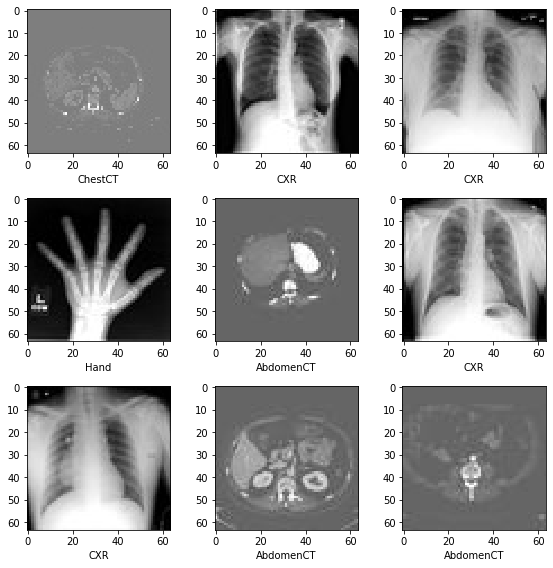

In [5]:
mp.subplots(3,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=9)):  # Take a random sample of 9 images and
    im = Image.open(imageFilesList[k])                      #      plot and label them
    arr = np.array(im)
    mp.subplot(3,3,i+1)
    mp.xlabel(classNames[imageClass[k]])
    mp.imshow(arr,cmap='gray',vmin=0,vmax=255)
mp.tight_layout()
mp.show()

## 转换数据并划分成训练、验证和测试集

您可能会从所给图像中发现以下几点。图像的质量一定有高低之分。一些图像的色度也会有所不同，即背景色不是黑色而是灰色。由于像素之间的差异更为细微，我们的模型可能更难从这些像素中提取到信息。因此，为了增加对比度，我们首先重新缩放每张图像，使像素值从 0 到 1 分布。

接下来，我们从其余图像中减去每个图像各自的平均像素值。原则上，网络可以通过训练来学习如何完成这一步。然而，激励函数通常在0值附近最为敏感或者最具非线性，因此如果能先将图像进行预处理，使其均值趋近于零（称为归一化），将有助于提高训练的初始阶段的敏感度和稳定性，进而提升训练速度。虽然这一小窍门对于我们此处使用的简单模型不是特别重要，但却能对复杂模型产生显著的影响。

此外，在执行任何操作之前，我们还需将 JPEG 图像转换为张量(矩阵)。下方定义了一个函数，其中包含上述所有步骤。

### 代码块 4

In [6]:
toTensor = tv.transforms.ToTensor()
def scaleImage(x):          # Pass a PIL image, return a tensor
    y = toTensor(x)
    if(y.min() < y.max()):  # Assuming the image isn't empty, rescale so its values run from 0 to 1
        y = (y - y.min())/(y.max() - y.min()) 
    z = y - y.mean()        # Subtract the mean value of the image
    return z

在定义完将图像转换为张量的函数之后，我们现在把所有图像创建成一个主体输入张量，还要相应创建一个标注张量。执行这段代码需要花些时间。我们再次检查缩放像素值的最终范围，并验证平均值是否（近乎）为零。

### 代码块 5

In [7]:
imageTensor = torch.stack([scaleImage(Image.open(x)) for x in imageFilesList])  # Load, scale, and stack image (X) tensor
classTensor = torch.tensor(imageClass)  # Create label (Y) tensor
print("Rescaled min pixel value = {:1.3}; Max = {:1.3}; Mean = {:1.3}"
      .format(imageTensor.min().item(),imageTensor.max().item(),imageTensor.mean().item()))

Rescaled min pixel value = -0.786; Max = 0.972; Mean = -1.23e-06


至此一切已准备就绪，接下来我们要将这些主体张量划分为三个数据集。

这是因为，一个模型可能包含数百万个自由参数，所以极有可能会<em><a href="https://en.wikipedia.org/wiki/Overfitting">过度拟合</a></em>所给的数据。换言之，虽然它可以将权重调整为能够准确预测每一张给定图像所需的精确值，但却无法识别哪怕只发生细微变化的原图像，更别提识别全新的图像了。

一种常见的解决方案是将数据划分为<b>训练集</b>（用于使损失函数最小化）和<b>验证集</b>（在训练期间单独评估，而不直接影响模型的权重）。不过，验证集会被用于修改<em>超参数</em>（用于控制模型训练的模型外参数）、选择每次训练中的最佳模型，或以其他方式间接影响训练。有鉴于此，我们通常还会创建第三个独立的<b>测试集</b>以在训练完成后对模型进行最终评估。

因为模型“看”到的数据越多，它就会变得越精确，所以我们通常会保留较小比例的数据用于验证和测试。

PyTorch 有一个内置的<a href="https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html">数据集</a>对象，该对象能够在处理更复杂的数据类型时简化这些步骤；但在这种情况下，它们耗费的工作量远大于节省的工作量。

下面的代码将把大约10％的索引随机分别分配给对应于验证集和测试集的列表。完成此操作后，我们就可以通过对主图像和标记张量的列表进行切片的方式来创建这些数据集。

### 代码块 6

In [8]:
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.1    # Define the fraction of images to move to test dataset

trainList = []
validList = []
testList = []

for i in range(numTotal):
    rann = np.random.random() # Randomly reassign images
    if rann < validFrac:
        validList.append(i)
    elif rann < testFrac + validFrac:
        testList.append(i)
    else:
        trainList.append(i)
        
nTrain = len(trainList)  # Count the number in each set
nValid = len(validList)
nTest = len(testList)
print("Training images =",nTrain,"Validation =",nValid,"Testing =",nTest)

Training images = 47383 Validation = 5832 Testing = 5739


如果对训练、验证和测试的数据划分感到满意，我们现在便可使用这些列表对主张量进行切片，代码如下。如果不满意，我们可以重新运行上述单元，改变划分比例。

### 代码块 7

In [9]:
trainIds = torch.tensor(trainList)    # Slice the big image and label tensors up into
validIds = torch.tensor(validList)    #       training, validation, and testing tensors
testIds = torch.tensor(testList)
trainX = imageTensor[trainIds,:,:,:]
trainY = classTensor[trainIds]
validX = imageTensor[validIds,:,:,:]
validY = classTensor[validIds]
testX = imageTensor[testIds,:,:,:]
testY = classTensor[testIds]

代码内的注释说明了模型架构的具体构成，不过我们此处概述一下所遇到的两种类型的层。

第一种是<b>卷积</b>层。在理解图像时，人眼首先会识别边缘和边界。然后，人们就可以在更高的抽象层次上辨认出曲线、形状和更复杂的结构。一系列的卷积层仅通过将邻近像素的信息组合在一起即可模拟有机体的这一过程。卷积的大小决定了有多少邻近像素参与加权汇总从而产生下一层；我们可以对图像（或更高层）中的每个像素应用多个卷积。下图所示是一个 3 × 3 卷积。卷积核的每个像素值（其实这些是需经训练的权重值）与其所对应的原始图像上的中心像素周边的像素值相乘，再对乘积结果进行求和，并将总和分配给下一层的中心像素（学名叫做“节点”）。这一过程在层内的每个像素及每个卷积核上重复。我们可以将多个卷积层依次叠加，这样就能发现越来越复杂的特征。

<img src="images/Convolution.png" width="600" alt="Convolution">

在几个卷积层之后，网络通常还有若干全连接层。首先，最后一层卷积层产生的结果会被“展平”为一个向量作为第一个全连接层。在全连接层中，输入层的每个节点（它存储一个值）与输出层的每个节点都通过权重连接在一起；与卷积层的像素情况不同，该层不会优先考虑相邻节点。输入层节点中的值与连接权重相乘，并在对应的输出层的节点中将乘积相加，然后存于该输出节点中。输出层的每个节点均重复进行此操作。

然而，在上述每个步骤中，我们都忽略了一个额外的步骤：应用激活函数。如果线性函数 `y = 3x + 2` 包含在函数 `z = 4y - 7` 中，则 z 仍是 x 的线性函数：`z = 12x + 1`。高维线性函数也是如此（计算加权和）。如果没有激活函数，无论我们叠加多少层，它们最终都能被单一一个层取代。为避免该情况，我们需要对每个输出层应用非线性激活函数。每层的激活函数不一定都相同。本架构中，我们选择 <a href="http://image-net.org/challenges/posters/JKU_EN_RGB_Schwarz_poster.pdf">ELU</a> 函数，不过也有许多其他的热门函数可供选用，例如 <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks)">ReLU</a>。

### 代码块 8

In [10]:
class MedNet(nn.Module):
    def __init__(self,xDim,yDim,numC): # Pass image dimensions and number of labels when initializing a model   
        super(MedNet,self).__init__()  # Extends the basic nn.Module to the MedNet class
        # The parameters here define the architecture of the convolutional portion of the CNN. Each image pixel
        # has numConvs convolutions applied to it, and convSize is the number of surrounding pixels included
        # in each convolution. Lastly, the numNodesToFC formula calculates the final, remaining nodes at the last
        # level of convolutions so that this can be "flattened" and fed into the fully connected layers subsequently.
        # Each convolution makes the image a little smaller (convolutions do not, by default, "hang over" the edges
        # of the image), and this makes the effective image dimension decreases.
        
        numConvs1 = 5
        convSize1 = 7
        numConvs2 = 10
        convSize2 = 7
        numNodesToFC = numConvs2*(xDim-(convSize1-1)-(convSize2-1))*(yDim-(convSize1-1)-(convSize2-1))

        # nn.Conv2d(channels in, channels out, convolution height/width)
        # 1 channel -- grayscale -- feeds into the first convolution. The same number output from one layer must be
        # fed into the next. These variables actually store the weights between layers for the model.
        
        self.cnv1 = nn.Conv2d(1, numConvs1, convSize1)
        self.cnv2 = nn.Conv2d(numConvs1, numConvs2, convSize2)

        # These parameters define the number of output nodes of each fully connected layer.
        # Each layer must output the same number of nodes as the next layer begins with.
        # The final layer must have output nodes equal to the number of labels used.
        
        fcSize1 = 400
        fcSize2 = 80
        
        # nn.Linear(nodes in, nodes out)
        # Stores the weights between the fully connected layers
        
        self.ful1 = nn.Linear(numNodesToFC,fcSize1)
        self.ful2 = nn.Linear(fcSize1, fcSize2)
        self.ful3 = nn.Linear(fcSize2,numC)
        
    def forward(self,x):
        # This defines the steps used in the computation of output from input.
        # It makes uses of the weights defined in the __init__ method.
        # Each assignment of x here is the result of feeding the input up through one layer.
        # Here we use the activation function elu, which is a smoother version of the popular relu function.
        
        x = F.elu(self.cnv1(x)) # Feed through first convolutional layer, then apply activation
        x = F.elu(self.cnv2(x)) # Feed through second convolutional layer, apply activation
        x = x.view(-1,self.num_flat_features(x)) # Flatten convolutional layer into fully connected layer
        x = F.elu(self.ful1(x)) # Feed through first fully connected layer, apply activation
        x = F.elu(self.ful2(x)) # Feed through second FC layer, apply output
        x = self.ful3(x)        # Final FC layer to output. No activation, because it's used to calculate loss
        return x

    def num_flat_features(self, x):  # Count the individual nodes in a layer
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

定义好网络的结构后，下面我们创建模型的实例。 我们将这一个代码行分离出来，以便在需要的时候我们可以继续执行或者重复使用后面的训练代码，而无需从头开始重置模型。

### 代码块 9

In [11]:
model = MedNet(imageWidth,imageHeight,numClass).to(dev)

## 训练模型

现在，我们就该训练模型了。下一个代码块可以实现这个操作。

首先，我们需要定义训练的超参数。**学习率**（learning rate）反映了模型经过每批数据训练后的更新速度。如果学习率过小，训练过程就会十分缓慢。如果学习率过大，权重调整的幅度就会过大，因而会错失真正的最小损失，甚至变得不稳定，进而模型不会收敛。**一次训练**（epoch）是指训练集里的所有数据都在模型上完整地运行了一次。有些模型需要经过数千次训练，这取决于任务的难度与模型的复杂度，但本模型仅需较少次训练便可获得高准确度。

我们使用验证数据来防止模型训练过度(过拟合)。训练数据与验证数据都出自同一个数据集，因此模型对这两部分数据产生的损失理应十分相近。基于此，我们对验证损失超出训练损失的范围值设置了一个上限。由于随机波动可能会造成一些差异，所以在高的验证损失持续数次训练之后我们才终止训练。

为模型输入大型数据集所需的内存用量可能大得惊人。**批量**（batches）便是解决这一问题的重要变通方案。通过在 GPU 上加载较小的数据子集并用其进行模型的训练，我们不仅可以节省内存，而且每次训练（epoch）对模型的权重的调整次数更多，进而加速训练。然而，更小的批量通常需要我们设置更小的学习率以避免不稳定性，所以需要进行一些权衡。

假设一个数据集中对应某一类标注的样本数很少，即使完全忽略这些样本，模型总体上仍能取得高准确度（但问题是无法对被忽略的类别进行预测）。关于这一问题，其中一个应对策略便是在损失函数中使用**类别权重**（计算损失时，对较少样本的类别使用较大的损失扩展系数）。但若一个类别的数据极其少，您最好使用数据增强来生成新图像，而不要仅使用类别权重，否则便相当于为网络重复输入相同的图像。

现在，我们进入实际的训练循环。第一步是将数据打乱，然后成批分割。PyTorch提供一个可自动完成此操作的 <a href="https://pytorch.org/docs/stable/_modules/torch/utils/data/dataloader.html#DataLoader">DataLoader</a> 类，但在本例中，这与手动完成此操作的难度相当。

接着，我们会在这些批量数据上进行迭代。我们将优化器中积累的信息归零，为模型输入批量数据，并计算批量的损失。我们使用<a href="https://en.wikipedia.org/wiki/Cross_entropy"><b>交叉熵</b></a>作为损失函数，它是一个常用的分类器指标。我们会在训练期间将这一损失添加到该次训练的损失累加值中，然后把交叉熵损失**反向传播**回网络。反向传播是一种数学算法，用于确定模型中每个权重相对于其他权重应作出多大改变，才能减小损失。确定后，优化器便会以一个事先选好的学习率更新权重。

在完成所有批量的训练之后，验证数据也会经历相同的过程，但无需进行反向传播和优化。最后计算平均损失，然后将验证损失与训练损失进行比较，测试是否出现过拟合。

请运行此单元以训练模型。

### 代码块 10

In [12]:
learnRate = 0.01          # Define a learning rate.
maxEpochs = 20            # Maximum training epochs
t2vRatio = 1.2            # Maximum allowed ratio of validation to training loss
t2vEpochs = 3             # Number of consecutive epochs before halting if validation loss exceeds above limit
batchSize = 300           # Batch size. Going too large will cause an out-of-memory error.
trainBats = nTrain // batchSize       # Number of training batches per epoch. Round down to simplify last batch
validBats = nValid // batchSize       # Validation batches. Round down
testBats = -(-nTest // batchSize)     # Testing batches. Round up to include all
CEweights = torch.zeros(numClass)     # This takes into account the imbalanced dataset.
for i in trainY.tolist():             #      By making rarer images count more to the loss, 
    CEweights[i].add_(1)              #      we prevent the model from ignoring them.
CEweights = 1. / CEweights.clamp_(min=1.)                     # Weights should be inversely related to count
CEweights = (CEweights * numClass / CEweights.sum()).to(dev)  # The weights average to 1
opti = om.SGD(model.parameters(), lr = learnRate)             # Initialize an optimizer


for i in range(maxEpochs):
    model.train()                     # Set model to training mode
    epochLoss = 0.
    permute = torch.randperm(nTrain)  # Shuffle data to randomize batches
    trainX = trainX[permute,:,:,:]
    trainY = trainY[permute]
    for j in range(trainBats):        # Iterate over batches
        opti.zero_grad()              # Zero out gradient accumulated in optimizer
        batX = trainX[j*batchSize:(j+1)*batchSize,:,:,:].to(dev)   # Slice shuffled data into batches
        batY = trainY[j*batchSize:(j+1)*batchSize].to(dev)         # .to(dev) moves these batches to the GPU
        yOut = model(batX)            # Evalute predictions
        loss = F.cross_entropy(yOut, batY,  weight=CEweights)       # Compute loss
        epochLoss += loss.item()      # Add loss
        loss.backward()               # Backpropagate loss
        opti.step()                   # Update model weights using optimizer
    validLoss = 0.
    permute = torch.randperm(nValid)  # We go through the exact same steps, without backprop / optimization
    validX = validX[permute,:,:,:]    # in order to evaluate the validation loss
    validY = validY[permute]
    model.eval()                      # Set model to evaluation mode
    with torch.no_grad():             # Temporarily turn off gradient descent
        for j in range(validBats):
            opti.zero_grad()
            batX = validX[j*batchSize:(j+1)*batchSize,:,:,:].to(dev)
            batY = validY[j*batchSize:(j+1)*batchSize].to(dev)
            yOut = model(batX)
            validLoss += F.cross_entropy(yOut, batY, weight=CEweights).item()
    epochLoss /= trainBats            # Average loss over batches and print
    validLoss /= validBats
    print("Epoch = {:-3}; Training loss = {:.4f}; Validation loss = {:.4f}".format(i,epochLoss,validLoss))
    if validLoss > t2vRatio * epochLoss:
        t2vEpochs -= 1                # Test if validation loss exceeds halting threshold
        if t2vEpochs < 1:
            print("Validation loss too high; halting to prevent overfitting")
            break
    

Epoch =   0; Training loss = 0.5248; Validation loss = 0.1678
Epoch =   1; Training loss = 0.1428; Validation loss = 0.1109
Epoch =   2; Training loss = 0.0971; Validation loss = 0.0747
Epoch =   3; Training loss = 0.0684; Validation loss = 0.0579
Epoch =   4; Training loss = 0.0515; Validation loss = 0.0435
Epoch =   5; Training loss = 0.0405; Validation loss = 0.0399
Epoch =   6; Training loss = 0.0327; Validation loss = 0.0305
Epoch =   7; Training loss = 0.0276; Validation loss = 0.0286
Epoch =   8; Training loss = 0.0237; Validation loss = 0.0230
Epoch =   9; Training loss = 0.0208; Validation loss = 0.0198
Epoch =  10; Training loss = 0.0181; Validation loss = 0.0179
Epoch =  11; Training loss = 0.0160; Validation loss = 0.0244
Epoch =  12; Training loss = 0.0142; Validation loss = 0.0172
Epoch =  13; Training loss = 0.0127; Validation loss = 0.0146
Epoch =  14; Training loss = 0.0123; Validation loss = 0.0134
Epoch =  15; Training loss = 0.0106; Validation loss = 0.0140
Validati

为防止过拟合，训练很可能会被提前终止。不过，最终损失应维持在 0.01 左右，这相比于模型刚开始训练时的随机猜测有了很大的改进（结果多少依赖于随机数是否奏效，而这取决于先前的单元执行次数）。

您可能也已注意到，在前几次训练步骤中，训练损失要比验证损失大得多。<b>根据您对训练过程的了解，您能解释这种现象吗？</b>

## 使用新数据测试模型

模型现已经过充分训练，我们下面就要让模型对测试数据集作出预测。模型会为每张图像输出一个包含6个元素的向量。该向量的每个值可粗略看作是图像属于每个类别的相对概率。基于此，我们认为具有最大概率值的类别即是模型的预测结果。

我们将使用这些预测结果生成一个混淆矩阵。混淆矩阵虽然听起来很复杂，但其实很容易理解。矩阵中的行表示正确的分类，列表示模型的预测结果。当行与列一致时（即沿对角线分布），则模型预测正确。

下方简短的代码片段可对测试批量进行迭代并填充混淆矩阵。

### 代码块 11

Accuracy =  0.995643840390312


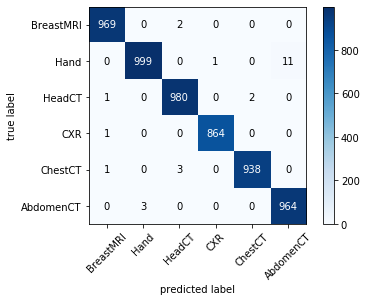

In [13]:
model.eval()
with torch.no_grad():
    permute = torch.randperm(nTest)                     # Shuffle test data
    testX = testX[permute,:,:,:]
    testY = testY[permute]
    pred = []

    for j in range(testBats):                           # Iterate over test batches
        batX = testX[j*batchSize:(j+1)*batchSize,:,:,:].to(dev)
        batY = testY[j*batchSize:(j+1)*batchSize].to(dev)
        yOut = model(batX)                              # Pass test batch through model
        predict = yOut.max(1)[1].cpu().numpy()
        pred = np.concatenate((pred, predict))
        
class_names = ['BreastMRI', 'Hand', 'HeadCT', 'CXR', 'ChestCT', 'AbdomenCT']
accuracy = accuracy_score(pred, testY)
print("Accuracy = ", accuracy)
cm = confusion_matrix(pred, testY)
_ = plot_confusion_matrix(cm, colorbar=True, class_names=class_names)

您可能会看到准确度达到 99% 以上。对于仅需几分钟即可进行训练的非常小的模型来说，这个结果还不错。现在看一下混淆矩阵。注意，有些错误相比其他更为常见 - <b>这类混淆对您来说是否有意义？</b>

开始练习之前，让我们来看看一些让模型难以分辨的图像。可以重新运行此单元以生成更多示例。

### 代码块 12


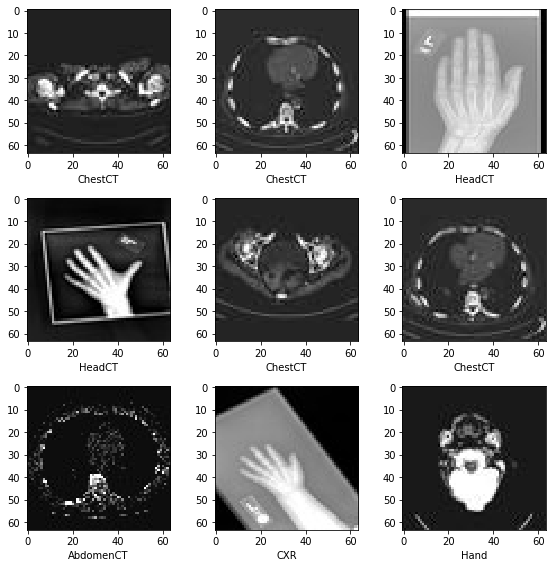

In [14]:
def scaleBack(x):               # Pass a tensor, return a numpy array from 0 to 1
    if(x.min() < x.max()):      # Assuming the image isn't empty, rescale so its values run from 0 to 1
        x = (x - x.min())/(x.max() - x.min())
    return x[0].to(cpu).numpy() # Remove channel (grayscale anyway)

model.eval()
mp.subplots(3,3,figsize=(8,8))
imagesLeft = 9
permute = torch.randperm(nTest)        # Shuffle test data
testX = testX[permute,:,:,:]
testY = testY[permute]
for j in range(testBats):              # Iterate over test batches
    batX = testX[j*batchSize:(j+1)*batchSize,:,:,:].to(dev)
    batY = testY[j*batchSize:(j+1)*batchSize].to(dev)
    yOut = model(batX)                 # Pass test batch through model
    pred = yOut.max(1)[1].tolist()     # Generate predictions by finding the max Y values
    for i, y in enumerate(batY.tolist()):
        if imagesLeft and y != pred[i]:         # Compare the actual y value to the prediction
            imagesLeft -= 1
            mp.subplot(3,3,9-imagesLeft)
            mp.xlabel(classNames[pred[i]])      # Label image with what the model thinks it is
            mp.imshow(scaleBack(batX[i]),cmap='gray',vmin=0,vmax=1)
mp.tight_layout()
mp.show()

有些图像确实令人困惑，即使是人类观察者也会被难倒。但像这种问题就更难理解了：为什么一个准确度高达 99% 的模型会对明显是“手”的图像作出错误分类呢？在<a href="https://medium.com/@jrzech/what-are-radiological-deep-learning-models-actually-learning-f97a546c5b98">可解释性领域中，人们开始探索这些问题</a>。

### 完成后，<a href="Part2-MedNIST2020.ipynb">单击此处</a>以继续到第二部分。

## 练习

<b>注意：建议您先完成实验的第二部分，然后再继续进行这些附加练习。</b>

重新启动内核（在“Kernel”菜单下）以清除练习期间使用过的内存，甚至复制笔记本（在“文件”菜单下）并以干净的副本进行每个练习可能更好。 由于时间可能有限，因此请仔细阅读练习，然后从最吸引您的练习开始。 如果您不熟悉深度学习，则特别推荐练习1、2和3。

<ol>
    <li>无需重置内核，请在代码块 10 中增加 <code>t2vRatio</code> 的值并继续训练。 这样可以提高在测试数据集上观察到的最终准确性吗？如果可以，准确度的提高幅度是否与训练损失变更所表明的结果相当呢？损失相对值的设置对训练意味着什么？</li><hr>
    <li>运行代码块 9 以重置模型，然后修改超参数并在代码块 10 中重新训练模型。最有意思的部分是学习率（可大可小）和批量大小（小批量效果较好；当增大批量时，您可能会在批量达到数千时耗尽内存）。注意其对训练的影响。您能让训练比使用默认值时收敛得更快吗？</li><hr>
    <li>修改代码块 8 中的网络结构，注意其对训练速度和最终准确度的影响
        <ol>
            <li>毫无难度：更改卷积数量、卷积大小和全连接层的数量</li>
            <li>中等难度：添加额外的卷积层或全连接层。参考现有代码。</li>
            <li>高难度：添加 <a href="https://pytorch.org/docs/stable/_modules/torch/nn/modules/batchnorm.html#BatchNorm1d">Batchnorm 层</a>、<a href="https://pytorch.org/docs/stable/_modules/torch/nn/modules/pooling.html#MaxPool2d">最大池化层</a>或 <a href="https://pytorch.org/docs/stable/_modules/torch/nn/modules/dropout#Dropout">Dropout 层</a>。</li>
        </ol>
    </li><hr>
    <li>让类别失衡。这是医学成像领域的常见问题，可以通过在代码块 2 中添加一行代码来完成：<code>imageFiles[5] = imageFiles[5][:-NNN]</code>，其中 <code>NNN</code> 表示要从最终类别中删除的图像数量。您也可以用 0 到 4 之间的数字代替 5。将此行代码插入 <code>imageFiles = ...</code> 与 <code>numEach = ...</code> 之间。在混淆矩阵中，您能为这个类别生成高准确度的最小集合有多小？此练习与下一个练习的结合很紧密。</li><hr>
    <li>在代码块 10 的 <code>opti = ...</code> 行后添加 <code>CEweights = torch.ones(numClass).to(dev)</code>，为损失函数移除权重。在识别更少见的图像类别时，这会在混淆矩阵中产生什么效果？您也可以使用 <code>CEweights = torch.tensor([a,b,c,d,e,f]).to(dev)</code> 实现自定义权重，其中 <code>a ...f</code> 是浮点数。本例中，注意一个或多个较大权重所产生的影响。</li><hr>
    <li>从代码块 4 中删除对张量作出的一到两处修改。注意其对早期训练和最终准确度的影响。</li><hr>
    <li><b>最终挑战：</b>根据从先前练习中积累的经验，您可以调整网络结构和训练过程，从而构建更准确的最终模型。模型经改良后，能否将其在处理测试集过程中所犯的错误减少到 10 个以下？</li>
</ol>



<a href="hints.txt">练习提示和部分解答</a>

<img src="images/DLI Header.png" alt="Header" style="width: 400px;"/>